In [1]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [2]:
def extract_Chroma_cqt(filename):
    audio,sample_rate=librosa.load(filename, res_type='kaiser_fast')
    chroma_cqt = np.mean(librosa.feature.chroma_cqt(y=audio, sr=sample_rate,n_chroma=100).T,axis=0)
    
    return chroma_cqt

In [3]:
start_time= timer()
a= extract_Chroma_cqt('E:/Thesis/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav')
end_time=timer()
print('time to extract features from one file: {:.3f}sec'.format((end_time-start_time)/60))

time to extract features from one file: 0.058sec


In [4]:
metadata=pd.read_csv('E:/Thesis/Dataset/UrbanSound8K/Augmented_metadata/UrbanSound8k_Augmented.csv')
metadata_ori=pd.read_csv('E:/Thesis/Dataset/UrbanSound8K/metadata/UrbanSound8K.csv')

In [5]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [6]:
Augment_list= ['pitch_2', 'pitch_-2','pitch_time290','pitch_time-290','pitch_time2110','pitch_time-2110','speed_90','speed_110']

In [7]:
stacked_features = []
exceptions=0
count=0

start_time = timer()
for i in range(10):
    for j in range(8):
  
        mypath = 'E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/'+ fold_list[i] + '/' + Augment_list[j] + '/'
        files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]

        for fn in files:
            try: 
                a= extract_Chroma_cqt(fn)
                features=np.reshape((a),(20,5))
            
            


            except: 
                print(fn)
                exceptions += 1
                continue

            l_row = metadata.loc[metadata['file']==fn.split('/')[-1]].values.tolist()
            label = l_row[0][-4]
            fold = i+1
            

            stacked_features.append([features, features.shape, label, fold])

            
for i in range(10):
    
    mypath = 'E:/Thesis/Dataset/UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try:
            a= extract_Chroma_cqt(fn)
            features=np.reshape((a),(20,5))
            
        except: 
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata_ori.loc[metadata_ori['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\User\Anaconda3\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_-2/.DS_Store


C:\Users\User\Anaconda3\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time290/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-290/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time2110/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/pitch_time-2110/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_90/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold1/speed_110/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_-2/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time290/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time-290/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time2110/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/pitch_time-2110/.DS_Store
E:/Thesis/Dataset/UrbanSound8K/Augmented_audio/fold2/speed_90/.DS_Store
E:/Thesis/Datase

In [11]:
cols=['Chroma_cens_feature', 'Matrix_shape','Label', 'Fold']
Chroma_features=pd.DataFrame(data=stacked_features, columns=cols)
Chroma_features.head()

,Chroma_cens_feature,Matrix_shape,Label,Fold
0,"[[0.5396146, 0.48717988, 0.43642205, 0.4032648...","(20, 5)",dog_bark,1
1,"[[0.4028212, 0.37180892, 0.36956087, 0.3403533...","(20, 5)",dog_bark,1
2,"[[0.5410408, 0.5867591, 0.60682976, 0.5607813,...","(20, 5)",dog_bark,1
3,"[[0.4466586, 0.35938162, 0.31248572, 0.3287319...","(20, 5)",dog_bark,1
4,"[[0.7798228, 0.84452456, 0.72355807, 0.5930090...","(20, 5)",gun_shot,1


In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


X = np.array(Chroma_features.Chroma_cens_feature.tolist())
y = np.array(Chroma_features.Label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [14]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)

In [15]:
x_train=np.reshape(x_train,(x_train.shape[0], 20,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 20,5,1))
print(x_train.shape, x_test.shape)

(62870, 20, 5, 1) (15718, 20, 5, 1)


In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

In [17]:
model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(20,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())
#model.add(GlobalAveragePooling2D())


model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [18]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 5, 64)         1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 3, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [19]:
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

15718/15718 [==============================] - 7s 466us/step
Pre-training accuracy: 5.7514%


In [20]:
start_time=timer()
history=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
end_time=timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))

Train on 62870 samples, validate on 15718 samples
Epoch 1/30
62870/62870 [==============================] - 78s 1ms/step - loss: 1.8816 - accuracy: 0.3090 - val_loss: 1.6451 - val_accuracy: 0.4142
Epoch 2/30
62870/62870 [==============================] - 80s 1ms/step - loss: 1.5816 - accuracy: 0.4364 - val_loss: 1.4429 - val_accuracy: 0.4963
Epoch 3/30
62870/62870 [==============================] - 79s 1ms/step - loss: 1.4514 - accuracy: 0.4849 - val_loss: 1.3365 - val_accuracy: 0.5280
Epoch 4/30
62870/62870 [==============================] - 80s 1ms/step - loss: 1.3656 - accuracy: 0.5161 - val_loss: 1.2657 - val_accuracy: 0.5578
Epoch 5/30
62870/62870 [==============================] - 79s 1ms/step - loss: 1.3021 - accuracy: 0.5391 - val_loss: 1.2069 - val_accuracy: 0.5769
Epoch 6/30
62870/62870 [==============================] - 80s 1ms/step - loss: 1.2516 - accuracy: 0.5587 - val_loss: 1.1888 - val_accuracy: 0.5826
Epoch 7/30
62870/62870 [==============================] - 79s 1ms/st

In [21]:
score = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: ", score[1]*100)

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1]*100)

62870/62870 [==============================] - 30s 478us/step
Training Accuracy:  81.54763579368591
Testing Accuracy:  69.41086649894714


In [22]:
def plot_accuracy():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('No of epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plot_loss():
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Testing')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('No of epoch')
    #plt.xlabel('No of epoch')
    plt.legend(loc="upper left")
    plt.show()

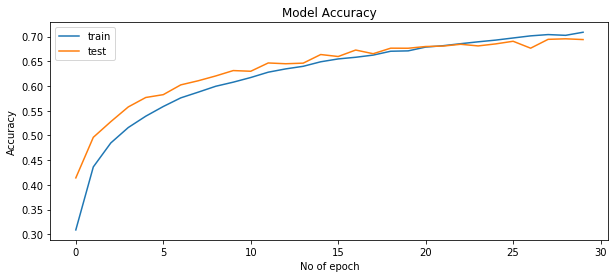

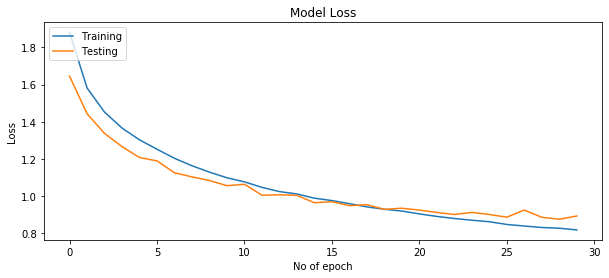

In [23]:
plt.figure(figsize=(10,4))
plot_accuracy()
plt.figure(figsize=(10,4))
plot_loss()

In [24]:
Class_Label = {'Air_conditioner':0, 'Car_horn':1, 'Children_playing':2, 'Dog_Bark':3, 
               'Drilling':4,'Engine_idling':5, 'Gun_Shot' :6, 'Jackhammer': 7 ,'Siren':8,'Street_Music':9 }

In [25]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis = 1)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9]
target_names = Class_Label.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(15718,) (15718,)
                  precision    recall  f1-score   support

 Air_conditioner       0.86      0.80      0.83      1823
        Car_horn       0.78      0.73      0.75       793
Children_playing       0.41      0.61      0.49      1766
        Dog_Bark       0.49      0.58      0.53      1814
        Drilling       0.74      0.68      0.71      1744
   Engine_idling       0.84      0.83      0.84      1798
        Gun_Shot       0.84      0.60      0.70       693
      Jackhammer       0.84      0.77      0.80      1786
           Siren       0.71      0.56      0.63      1685
    Street_Music       0.81      0.73      0.77      1816

        accuracy                           0.69     15718
       macro avg       0.73      0.69      0.70     15718
    weighted avg       0.72      0.69      0.70     15718



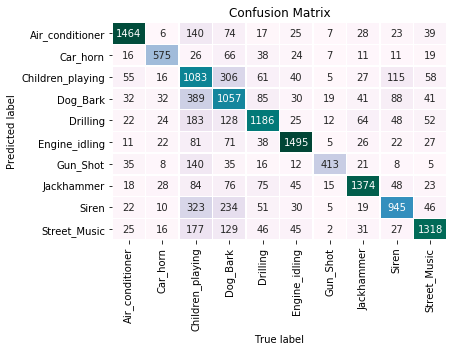

<Figure size 720x288 with 0 Axes>

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(mat, square=False, annot=True, fmt='d',cbar=False,linewidths=.5,xticklabels=Class_Label.keys(),yticklabels=Class_Label.keys(), ax=ax, cmap='PuBuGn')
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top -0.5)
ax.set_title('Confusion Matrix')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label');

In [27]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [28]:
labels = ['Air Conditioner','Car Horn','Children Playing','Dog bark','Drilling','Engine Idling','Gun Shot','Jackhammer','Siren','Street Music']

In [29]:
accuracies=acc_per_class(mat)
pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
5,Engine Idling,83.147942
0,Air Conditioner,80.307186
7,Jackhammer,76.931691
9,Street Music,72.577093
1,Car Horn,72.509458
4,Drilling,68.004587
2,Children Playing,61.325028
6,Gun Shot,59.595960
3,Dog bark,58.269019
8,Siren,56.083086


Text(0.5, 1.0, 'Accuracy per Class')

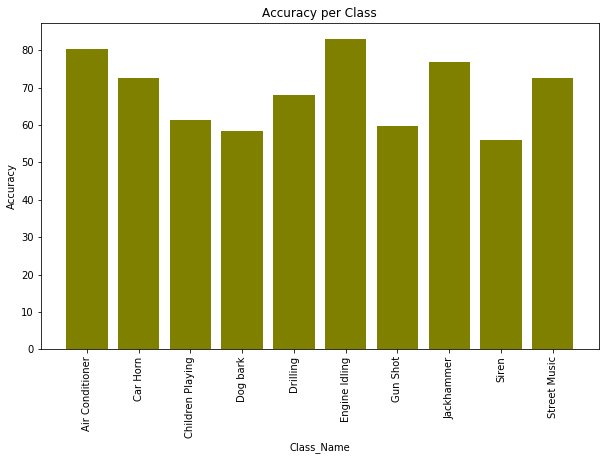

In [30]:
Y=np.around(accuracies , decimals=1)
index=np.arange(len(labels))
plt.figure(figsize=(10,6))
plt.bar(index, Y, color='olive')
plt.xticks(index, labels, rotation=90)
plt.xlabel('Class_Name')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')